# Load train and test datasets already modified after R analysis

After R analysis with multiple regression, we have found that the best model is the one that includes the following features:
MSZoning + LotArea + Street + LandContour + LotConfig + 
                   LandSlope + Neighborhood + Condition1 + BldgType + 
                   HouseStyle + OverallQual + OverallCond + YearBuilt + YearRemodAdd + 
                   RoofStyle + Foundation + BsmtQual + BsmtCond + 
                   BsmtExposure + BsmtUnfSF + TotalBsmtSF + Heating + HeatingQC + 
                   CentralAir + FullBath + BedroomAbvGr + KitchenQual + Functional + 
                   GarageType + GarageArea + SaleType + SaleCondition + FireplaceQu + PoolQC

In [1]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

df_trainfull = pd.read_csv('train_v1.csv', index_col=0)
df_test = pd.read_csv('test.csv', index_col=0)
df_trainfull.head()

,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,YrSold,SaleType,SaleCondition,Alley,FireplaceQu,PoolQC,Fence,MiscFeature,MoSoldFac,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,8450,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,2008,WD,Normal,none,none,none,none,none,2,208500
2,RL,80.0,9600,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,2007,WD,Normal,none,TA,none,none,none,5,181500
3,RL,68.0,11250,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,2008,WD,Normal,none,TA,none,none,none,9,223500
4,RL,60.0,9550,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,2006,WD,Abnorml,none,Gd,none,none,none,2,140000
5,RL,84.0,14260,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,2008,WD,Normal,none,TA,none,none,none,12,250000


In [2]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# Convert categorical to numerical features

### Select categorical features

In [3]:
# It helps the recognition of cat features
cat_df_trainfull = df_trainfull.select_dtypes(include=['object'])
cat_df_trainfull

,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,Alley,FireplaceQu,PoolQC,Fence,MiscFeature
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,none,none,none,none
2,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,TA,none,none,none
3,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,TA,none,none,none
4,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,TA,TA,Y,WD,Abnorml,none,Gd,none,none,none
5,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,TA,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,TA,none,none,none
1457,RL,Pave,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,TA,none,MnPrv,none
1458,RL,Pave,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,...,TA,TA,Y,WD,Normal,none,Gd,none,GdPrv,Shed


In [4]:
#Convert cat into num for trainfull
df_trainfull_cat_to_num = pd.get_dummies(df_trainfull)
df_trainfull_cat_to_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,FullBath,BedroomAbvGr,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,150,856,2,3,...,0,0,0,0,1,0,0,0,0,1
2,80.0,9600,6,8,1976,1976,284,1262,2,3,...,0,0,0,0,1,0,0,0,0,1
3,68.0,11250,7,5,2001,2002,434,920,2,3,...,0,0,0,0,1,0,0,0,0,1
4,60.0,9550,7,5,1915,1970,540,756,1,3,...,0,0,0,0,1,0,0,0,0,1
5,84.0,14260,8,5,2000,2000,490,1145,2,4,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917,6,5,1999,2000,953,953,2,3,...,0,0,0,0,1,0,0,0,0,1
1457,85.0,13175,6,6,1978,1988,589,1542,2,3,...,0,0,1,0,0,0,0,0,0,1
1458,66.0,9042,7,9,1941,2006,877,1152,2,4,...,1,0,0,0,0,0,0,1,0,0


In [5]:
export_csv = df_trainfull_cat_to_num.to_csv ('trainfull_all_num.csv', header=True)

In [6]:
#Convert cat into num for test
df_test_cat_to_num = pd.get_dummies(df_test)
df_test_cat_to_num

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0


In [7]:
export_csv = df_test_cat_to_num.to_csv ('test_all_num.csv', header=True)

# Analysis of the dataset

In [8]:
train = pd.read_csv('trainfull_all_num.csv', header=0)
test = pd.read_csv('test_all_num.csv', header=0)
train.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtUnfSF,TotalBsmtSF,FullBath,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_none
0,1,65.0,8450,7,5,2003,2003,150,856,2,...,0,0,0,0,1,0,0,0,0,1
1,2,80.0,9600,6,8,1976,1976,284,1262,2,...,0,0,0,0,1,0,0,0,0,1
2,3,68.0,11250,7,5,2001,2002,434,920,2,...,0,0,0,0,1,0,0,0,0,1
3,4,60.0,9550,7,5,1915,1970,540,756,1,...,0,0,0,0,1,0,0,0,0,1
4,5,84.0,14260,8,5,2000,2000,490,1145,2,...,0,0,0,0,1,0,0,0,0,1


In [9]:
test.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0


In [10]:
id_col = test['Id'].values.tolist()

In [11]:
types = train.dtypes
print(types)

Id                    int64
LotFrontage         float64
LotArea               int64
OverallQual           int64
OverallCond           int64
                     ...   
MiscFeature_Gar2      int64
MiscFeature_Othr      int64
MiscFeature_Shed      int64
MiscFeature_TenC      int64
MiscFeature_none      int64
Length: 251, dtype: object


In [12]:
types = test.dtypes
print(types)

Id                         int64
MSSubClass                 int64
LotFrontage              float64
LotArea                    int64
OverallQual                int64
                          ...   
SaleCondition_AdjLand      int64
SaleCondition_Alloca       int64
SaleCondition_Family       int64
SaleCondition_Normal       int64
SaleCondition_Partial      int64
Length: 271, dtype: object


In [13]:
#find the corretation between the feature and target
pd.set_option('display.max_rows', train.shape[0]+1)
corr = train.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice                1.000000
OverallQual              0.790982
GarageArea               0.623431
TotalBsmtSF              0.613581
FullBath                 0.560664
BsmtQual_Ex              0.553105
YearBuilt                0.522897
YearRemodAdd             0.507101
KitchenQual_Ex           0.504094
Foundation_PConc         0.497734
ExterQual_Gd             0.452466
ExterQual_Ex             0.451164
BsmtFinType1_GLQ         0.434597
HeatingQC_Ex             0.434543
GarageFinish_Fin         0.419678
Neighborhood_NridgHt     0.402149
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.351799
FireplaceQu_Gd           0.339329
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Neighborhood_NoRidge     0.330424
KitchenQual_Gd           0.321641
BsmtExposure_Gd          0.307298
Exterior2nd_VinylSd      0.306389
GarageCond_TA            0.275872
LotArea                  0.263843
FireplaceQu_Ex           0.255239
CentralAir_Y  

From this correlation we can try two models with differents features:
* 1- corr < 0.5 :OverallQual, GarageArea, TotalBsmtSF, FullBath, BsmtQual_Ex, YearBuilt, YearRemodAdd, KitchenQual_Ex        
* 2- corr < 0.6 :OverallQual, GarageArea, TotalBsmtSF

### Analysis of correlated features

In [14]:
#OverallQual
train.OverallQual.unique()
#Creating a pivot table 
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


<IPython.core.display.Javascript object>


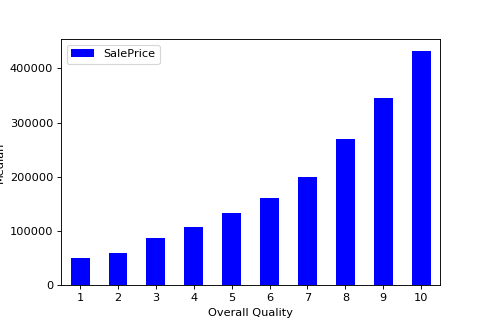

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook

quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>


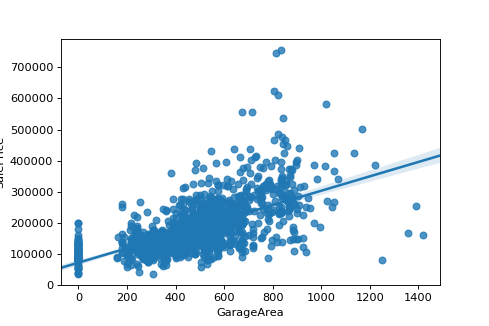

/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [33]:
# GarageArea
%matplotlib notebook
sns.regplot(x='GarageArea',y='SalePrice',data=train)

<IPython.core.display.Javascript object>


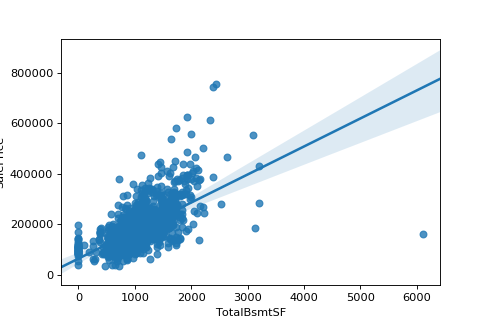

In [34]:
# GarageArea
%matplotlib notebook
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=train)

In [35]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
LotFrontage,259
MiscFeature_none,0
Condition2_RRAe,0
HouseStyle_2Story,0
HouseStyle_2.5Unf,0
HouseStyle_2.5Fin,0
HouseStyle_1Story,0
HouseStyle_1.5Unf,0
HouseStyle_1.5Fin,0


# Prediction with Keras

In [36]:
 pip install keras

Note: you may need to restart the kernel to use updated packages.


## 1-Correlation < 0.5

In [38]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

cols = ['SalePrice','OverallQual','GarageArea','TotalBsmtSF','FullBath','BsmtQual_Ex','YearBuilt','YearRemodAdd','KitchenQual_Ex']
df_train = train[cols]

# Always standard scale the data before using NN
scale = StandardScaler()
X_train = df_train[['OverallQual','GarageArea','TotalBsmtSF','FullBath','BsmtQual_Ex','YearBuilt','YearRemodAdd','KitchenQual_Ex']]
X_train = scale.fit_transform(X_train)
# Y is just the 'SalePrice' column
y = df_train['SalePrice'].values
seed = 7
np.random.seed(seed)
# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.33, random_state=seed)

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [39]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer ='adam', loss = 'mean_squared_error', 
              metrics =[metrics.mae])
    return model

In [40]:
model = create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 40)                1240      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 41        
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [43]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=150, batch_size=32)

Train on 978 samples, validate on 482 samples
Epoch 1/150
978/978 [==============================] - 0s 103us/step - loss: 1623596500.0245 - mean_absolute_error: 27036.7695 - val_loss: 1860376875.2863 - val_mean_absolute_error: 29186.1016
Epoch 2/150
978/978 [==============================] - 0s 99us/step - loss: 1621839255.0348 - mean_absolute_error: 26955.3652 - val_loss: 1859589916.1494 - val_mean_absolute_error: 29095.6602
Epoch 3/150
978/978 [==============================] - 0s 88us/step - loss: 1610514794.5358 - mean_absolute_error: 26895.9121 - val_loss: 1852617214.1411 - val_mean_absolute_error: 29087.5801
Epoch 4/150
978/978 [==============================] - 0s 123us/step - loss: 1607555152.6217 - mean_absolute_error: 26804.7188 - val_loss: 1851225474.6556 - val_mean_absolute_error: 29006.2754
Epoch 5/150
978/978 [==============================] - 0s 151us/step - loss: 1600012888.4744 - mean_absolute_error: 26783.4766 - val_loss: 1842380214.9710 - val_mean_absolute_error: 28

978/978 [==============================] - 0s 91us/step - loss: 1453500315.7464 - mean_absolute_error: 25077.0195 - val_loss: 1758567824.9959 - val_mean_absolute_error: 27704.0605
Epoch 44/150
978/978 [==============================] - 0s 140us/step - loss: 1450914740.7444 - mean_absolute_error: 25092.3633 - val_loss: 1755300197.7095 - val_mean_absolute_error: 27731.3438
Epoch 45/150
978/978 [==============================] - 0s 206us/step - loss: 1452510807.7546 - mean_absolute_error: 25035.9199 - val_loss: 1758811983.6680 - val_mean_absolute_error: 27649.5117
Epoch 46/150
978/978 [==============================] - 0s 263us/step - loss: 1446530878.9530 - mean_absolute_error: 25063.7227 - val_loss: 1754539003.7510 - val_mean_absolute_error: 27687.5430
Epoch 47/150
978/978 [==============================] - 0s 246us/step - loss: 1446450539.3211 - mean_absolute_error: 24999.5645 - val_loss: 1755779200.5311 - val_mean_absolute_error: 27626.3652
Epoch 48/150
978/978 [======================

978/978 [==============================] - 0s 68us/step - loss: 1396658599.5256 - mean_absolute_error: 24494.0918 - val_loss: 1743848909.0124 - val_mean_absolute_error: 27311.5605
Epoch 86/150
978/978 [==============================] - 0s 122us/step - loss: 1395406571.0593 - mean_absolute_error: 24471.7676 - val_loss: 1744217375.3361 - val_mean_absolute_error: 27363.9453
Epoch 87/150
978/978 [==============================] - 0s 148us/step - loss: 1396487352.4090 - mean_absolute_error: 24484.5605 - val_loss: 1744267223.6349 - val_mean_absolute_error: 27373.3477
Epoch 88/150
978/978 [==============================] - 0s 177us/step - loss: 1399291078.9366 - mean_absolute_error: 24540.1484 - val_loss: 1736442167.2365 - val_mean_absolute_error: 27488.0957
Epoch 89/150
978/978 [==============================] - 0s 250us/step - loss: 1398823758.2658 - mean_absolute_error: 24469.3887 - val_loss: 1743241857.3278 - val_mean_absolute_error: 27336.4844
Epoch 90/150
978/978 [======================

978/978 [==============================] - 0s 96us/step - loss: 1374868400.0327 - mean_absolute_error: 24258.3320 - val_loss: 1745167881.5602 - val_mean_absolute_error: 27227.5391
Epoch 128/150
978/978 [==============================] - 0s 123us/step - loss: 1374504407.6892 - mean_absolute_error: 24243.1328 - val_loss: 1744256042.4896 - val_mean_absolute_error: 27223.1484
Epoch 129/150
978/978 [==============================] - 0s 213us/step - loss: 1377099569.7996 - mean_absolute_error: 24352.3457 - val_loss: 1740004955.3527 - val_mean_absolute_error: 27303.4219
Epoch 130/150
978/978 [==============================] - 0s 171us/step - loss: 1374139742.2331 - mean_absolute_error: 24284.4648 - val_loss: 1743910541.0124 - val_mean_absolute_error: 27230.6660
Epoch 131/150
978/978 [==============================] - 0s 136us/step - loss: 1372758855.4601 - mean_absolute_error: 24290.8828 - val_loss: 1742891666.5892 - val_mean_absolute_error: 27312.4277
Epoch 132/150
978/978 [=================

<IPython.core.display.Javascript object>


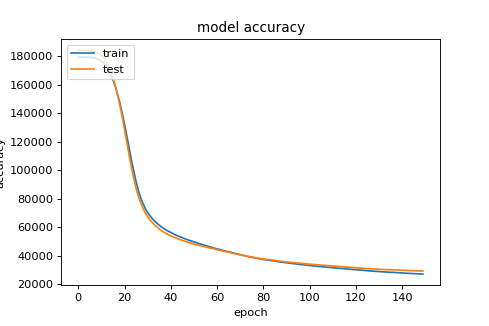

In [42]:
%matplotlib notebook
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


<IPython.core.display.Javascript object>


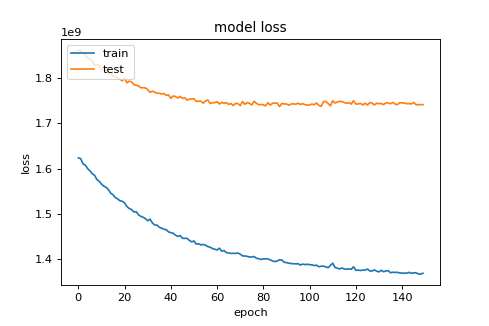

In [44]:
# summarize history for loss
%matplotlib notebook
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
cols = ['OverallQual','GarageArea','TotalBsmtSF','FullBath','BsmtQual_Ex','YearBuilt','YearRemodAdd','KitchenQual_Ex']
df_test = test[cols]
X_test = df_test[cols].values

# Always standard scale the data before using NN
scale = StandardScaler()
X_test = scale.fit_transform(X_test)

In [46]:
prediction = model.predict(X_test)

In [47]:
prediction

array([[145112.33],
       [152155.19],
       [159088.1 ],
       ...,
       [156899.28],
       [113677.82],
       [218129.86]], dtype=float32)

In [48]:
submission = pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction

In [49]:
submission.to_csv('submission_final.csv', index=False)

In [51]:
import kaggle
kaggle.api.competition_submit("submission_2.csv", "test_2", "house-prices-advanced-regression-techniques")

100%|██████████| 22.6k/22.6k [00:03<00:00, 6.25kB/s]


Successfully submitted to House Prices: Advanced Regression Techniques

In [52]:
score= 0.19288
print("Kaggle score:", score)

Kaggle score: 0.19288
